# Forbes Richest Athletes 

<img src="https://i.ytimg.com/vi/NPOdcCfyUnw/maxresdefault.jpg" width="700" height="500" />

**Data Dictionary**
1. Name: Name of the athlete.
2. Nationality: Name of the country the athlete belongs to.
3. Current Rank: Rank in the corresponding Year.
4. Previous Year Rank: Rank in in the preceding year.
5. Sport: Name of the sports that athlete played that year.
6. Year: Current year of ranking.
7. earnings ( million) : Earnings of the athlete in millions in the corresponding year. 

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("deep")
from warnings import filterwarnings
filterwarnings("ignore")

In [11]:
df = pd.read_csv("Forbes+Richest+Athletes+1990-2019.csv")

In [6]:
df.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Mike Tyson,USA,1,Not Listed,Boxing,1990,28.6
1,Buster Douglas,USA,2,Not Listed,Boxing,1990,26.0
2,Sugar Ray Leonard,USA,3,Not Listed,Boxing,1990,13.0
3,Ayrton Senna,Brazil,4,Not Listed,Auto Racing,1990,10.0
4,Alain Prost,France,5,Not Listed,Auto Racing,1990,9.0


In [7]:
df.isnull().sum()

Name                    0
Nationality             0
Current Rank            0
Previous Year Rank      0
Sport                   0
Year                    0
earnings ($ million)    0
dtype: int64

In [8]:
df.shape

(291, 7)

### 1. Atheletes from which country have been listed most number of times in the Forbes Richest Athletes from 1990 to 2019?


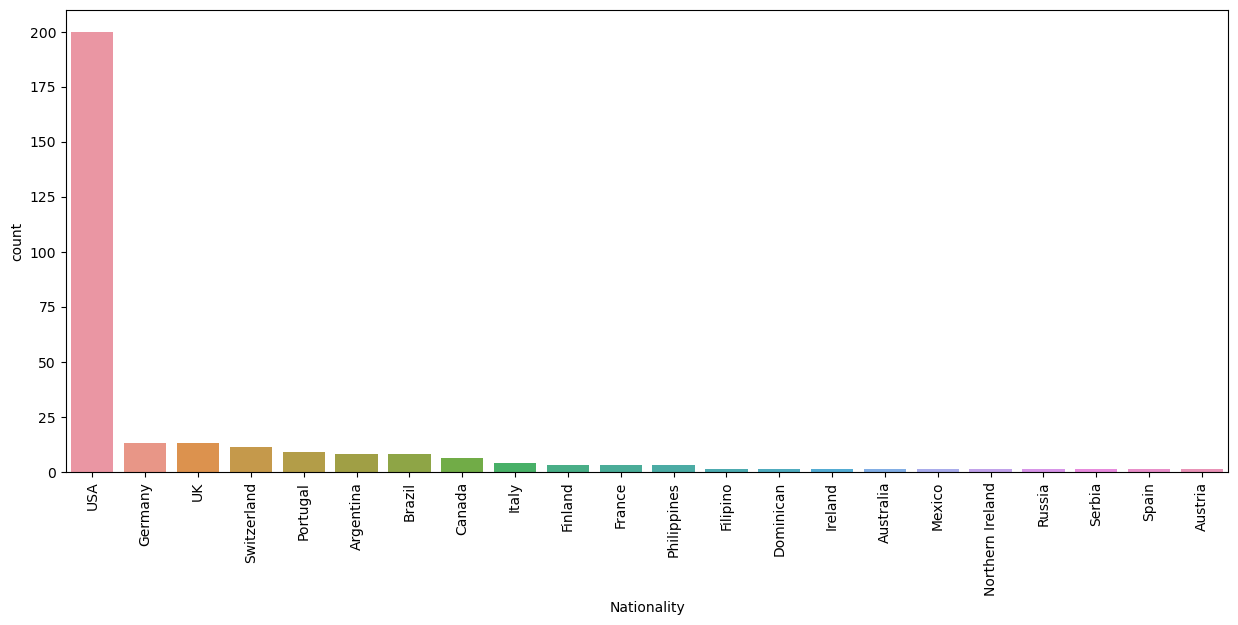

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(x="Nationality",data = df, order=df['Nationality'].value_counts().index)
plt.xticks(rotation = 90)# This code display the country names on x-axis verticaly
plt.show()

### 2. Making a plot visualizing year wise top earning (rank-1) athletes. In which year the rank 1 athlete earned the most? Which was the athlete who earned the most and what sport did he play? How much did the athlete earn?


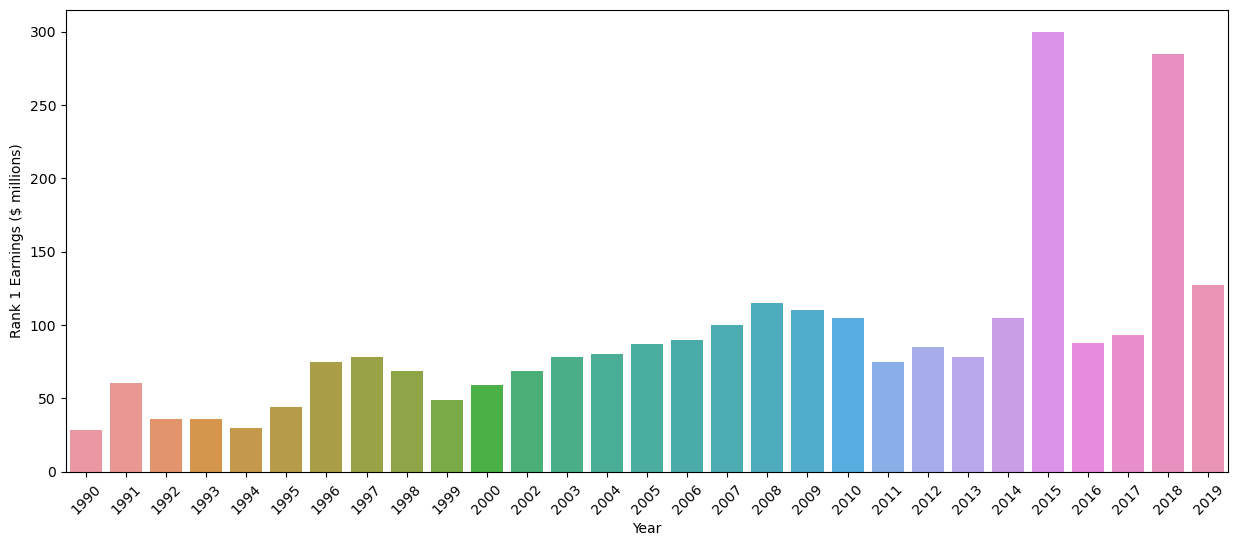

In [27]:
plt.figure(figsize = (15,6))
sns.barplot(x=df[df['Current Rank']==1]['Year'],y=df[df['Current Rank']==1]['earnings ($ million)'])
plt.xticks(rotation=45)
plt.ylabel("Rank 1 Earnings ($ millions)")
plt.show()

In [28]:
####As seen in the above plot highest earning of rank 1 athlete among all these years is in year 2015, lets find out who he is?
df[df['Year']==2015].head(1)

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
241,Floyd Mayweather,USA,1,1,Boxing,2015,300.0


In [ ]:
### Floyd Mayweather for Boxing was paid the most in 2015. He earned $300 millon

### 3. Which athlete has been most frequently ranked number 1 from 1990 to 2019? 

In [34]:
rank1_df = df[df['Current Rank']==1] 
rank1_df["Name"].value_counts().keys()

Index(['Tiger Woods', 'Michael Jordan', 'Floyd Mayweather', 'Mike Tyson',
       'Michael Schumacher', 'Cristiano Ronaldo', 'Evander Holyfield',
       'Lionel Messi'],
      dtype='object')

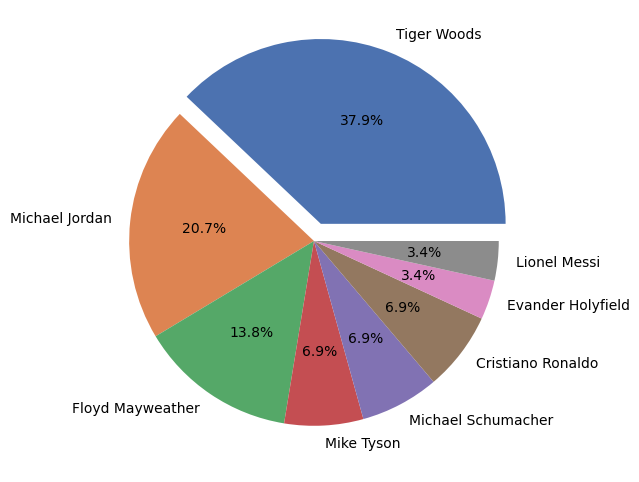

In [35]:
plt.figure(figsize=(15,6))
labels = rank1_df["Name"].value_counts().keys()
plt.pie(rank1_df['Name'].value_counts(), autopct = '%.1f%%',explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0],labels = labels)
plt.show()

In [ ]:
# tiger woods has been the most frequently ranked number 1 athlete from 1990 to 2019.

### 4. Players from which 2 sports have been listed least number of times in the Forbes RIchest Athletes List?


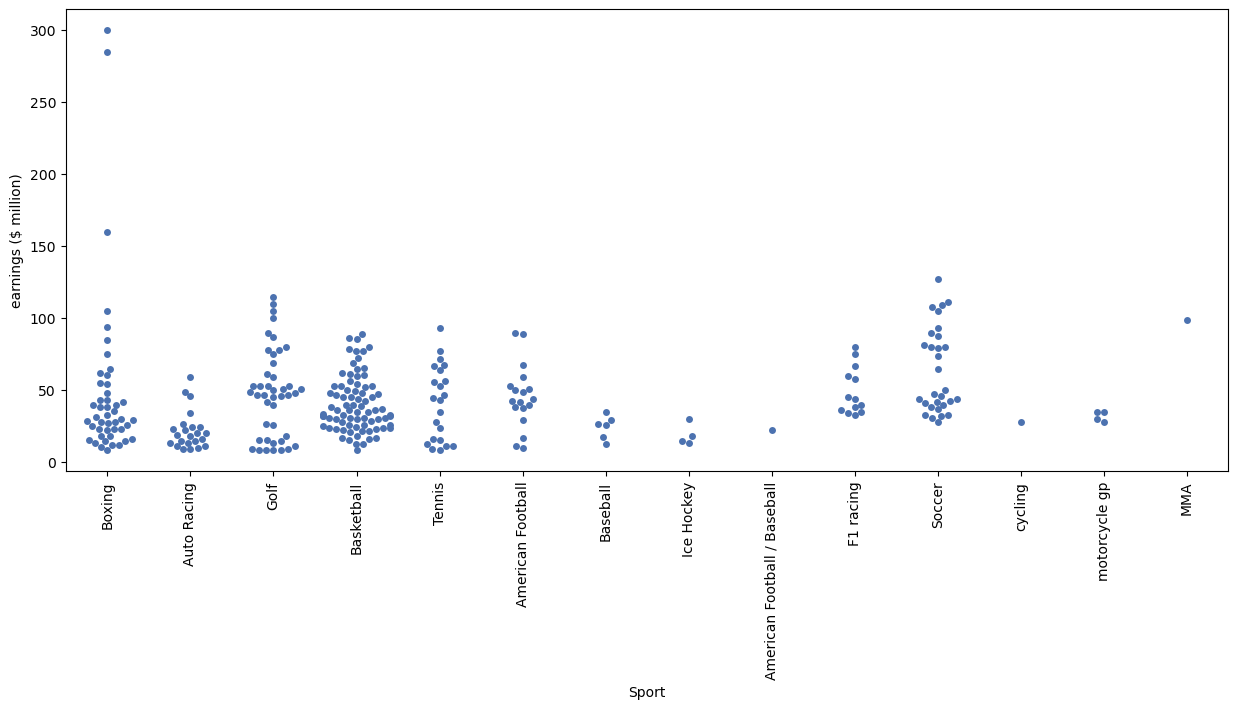

In [36]:
plt.figure(figsize = (15,6))
sns.swarmplot(x='Sport',y='earnings ($ million)', data = df)
plt.xticks(rotation= 90)
plt.show()

#### As we can see from the the plot, cycling and MMA are the sports that had the lowest density in terms of number of times players being listed in Forbes Richest athletes list.


In [38]:
df[df["Sport"]== 'American Football / Baseball']

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
52,Deion Sanders,USA,3,>10,American Football / Baseball,1995,22.5


####  American Football/Baseball is not considered in the lowest density as it is not a unique game. Both these games were played by an athlete in year 1995.As seen in the graph both games uniquely doest not have low density.

### 5. Relationship between Current rank and earnings with the help of a suitable plot.


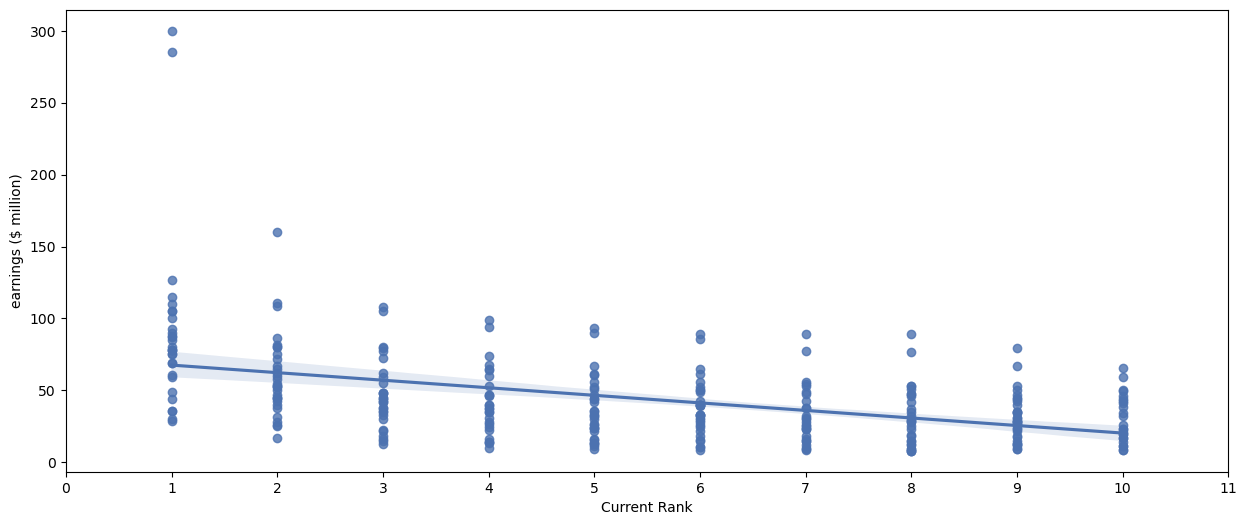

In [40]:
plt.figure(figsize = (15,6))
sns.regplot(x= "Current Rank", y="earnings ($ million)", data = df)
plt.xticks(np.arange(0,12))
plt.show()

### Q6. Which three sports have the highest spread in terms of earnings (highest IQR)?
[Hint : use boxplot]

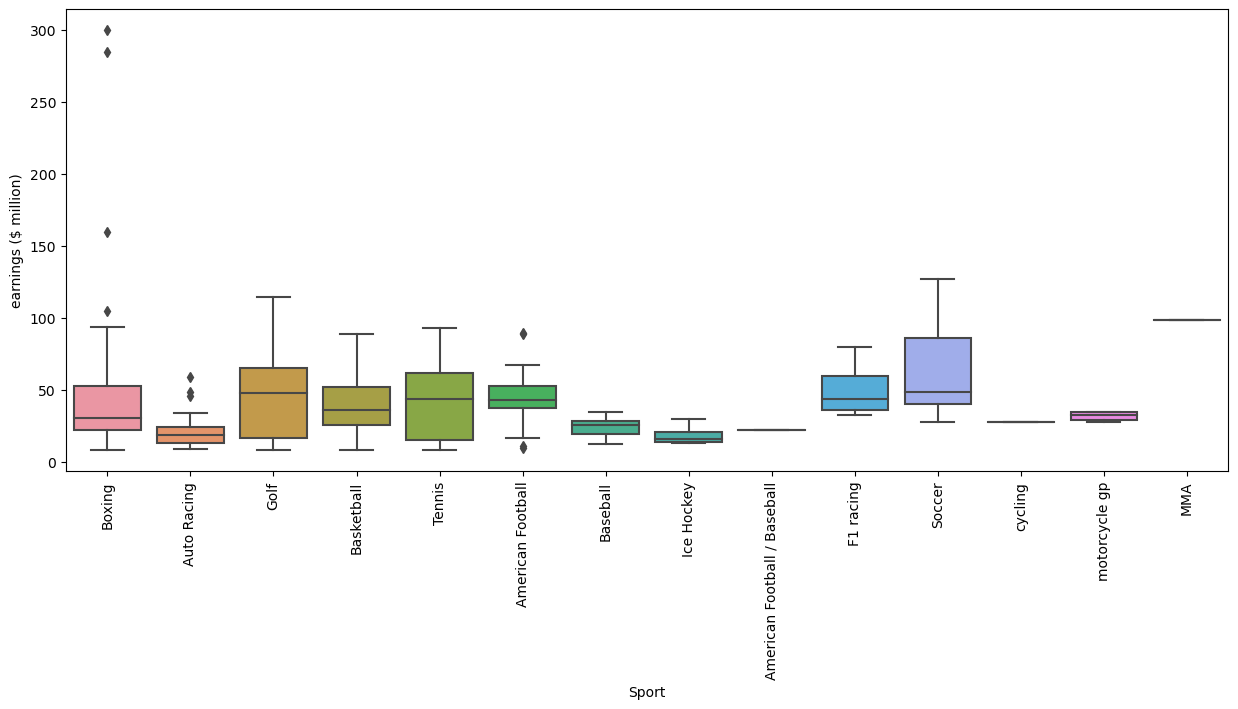

In [41]:
plt.figure(figsize = (15,6))
sns.boxplot(y = 'earnings ($ million)', x = 'Sport', data = df)
plt.xticks(rotation=90)
plt.show()

#### Golf, Tennis and Soccer are the three sports with highest IQR

### 7.  Trend in the positions at which Tiger Woods has appeared in the Forbes Richest Athletes list overs the years.


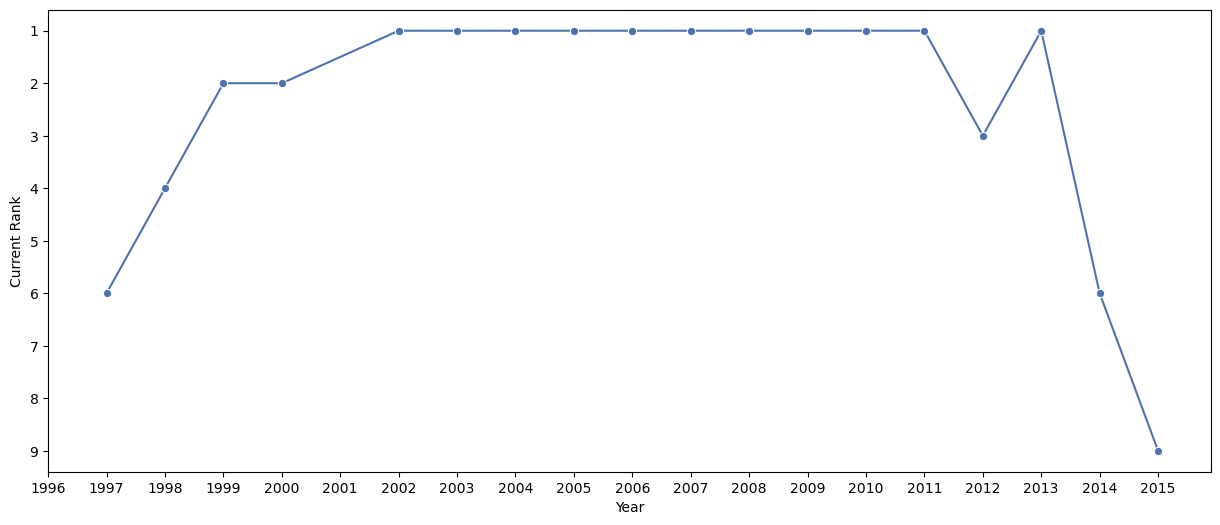

In [44]:
tigerW_df = df[df["Name"] == 'Tiger Woods']
plt.figure(figsize= (15,6))
sns.lineplot( x = 'Year', y = 'Current Rank', data = tigerW_df, marker = 'o')
plt.gca().invert_yaxis()
plt.xticks (np.arange(1996,2016))
plt.show()

#### As we can see from the plot, Tiger woods has consistently retained rank 1 from 2002 to 2011. He dropped to rank 3 in 2012 but regained his top position in 2013.

### 8. The trend of the earnings of Tiger Woods overs the years.


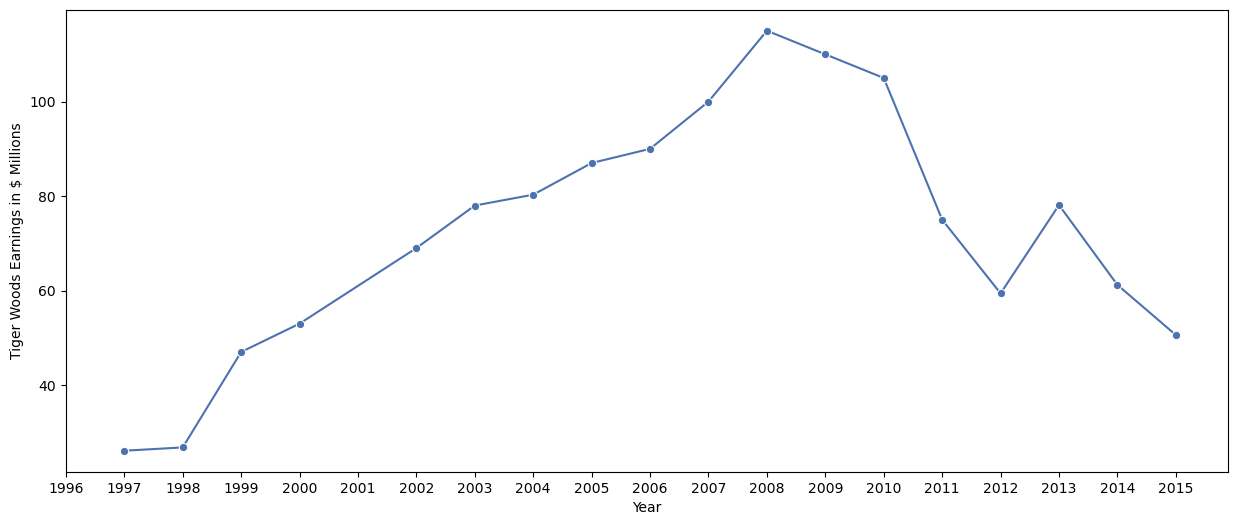

In [45]:
tigerW_df = df[df["Name"] == 'Tiger Woods']
plt.figure(figsize= (15,6))
sns.lineplot( x = 'Year', y = 'earnings ($ million)', data = tigerW_df, marker = 'o')
plt.xticks (np.arange(1996,2016))
plt.ylabel('Tiger Woods Earnings in $ Millions')
plt.show()

#### As we can see from the plot, the earnings of Tiger Woods had been consistently increasing over the years till 2008. After 2008, we can clearly see a downfall in his earnings over the years. As seen in the news around 2010 he got divorced and there was a visible downfall in his earnings and performance.

### 9. Displaying the distribution of the earnings of Tiger Woods. How the distribution looks like and interpret some insights from the plot.


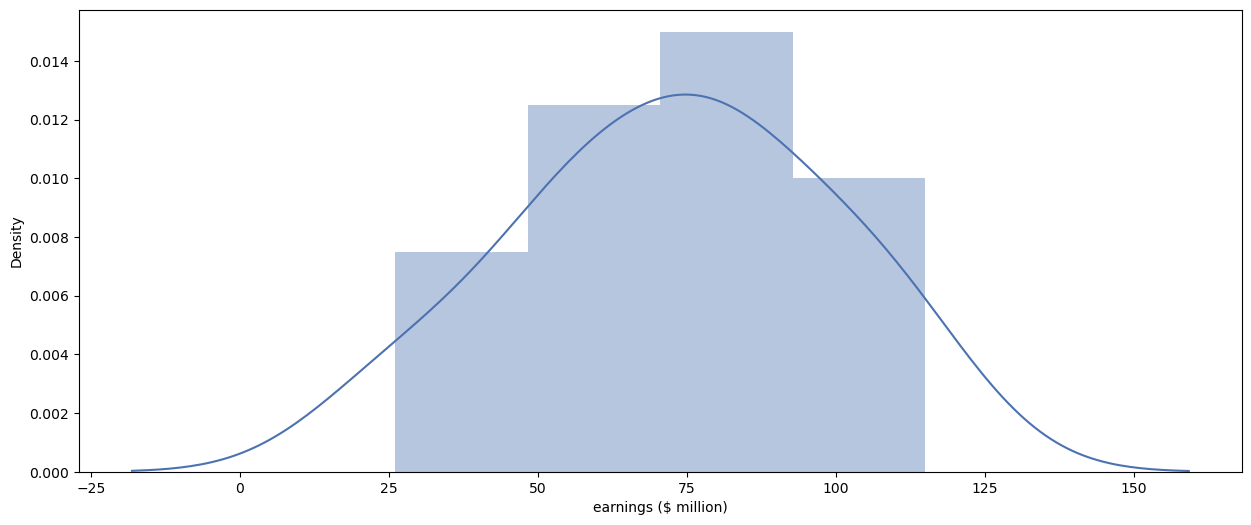

In [46]:
plt.figure(figsize= (15,6))
sns.distplot(tigerW_df['earnings ($ million)'])
plt.show()

In [47]:
tigerW_df['earnings ($ million)'].mean()

72.8611111111111

In [48]:
tigerW_df['earnings ($ million)'].median()

76.5

### 10. Has the earnings of the richest athletes increased over the period of 30 years? The correlation between year and earnings.


In [50]:
corr = df[["Year","earnings ($ million)"]].corr()
corr

,Year,earnings ($ million)
Year,1.000000,0.638597
earnings ($ million),0.638597,1.000000


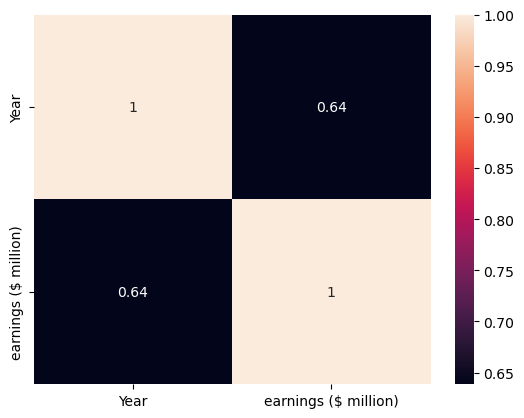

In [51]:
sns.heatmap(corr,annot =True)
plt.show()

#### From the heatmap we can see that there is a positive correlation between earnings and year. This can also be verified from the scatterplot shown below.

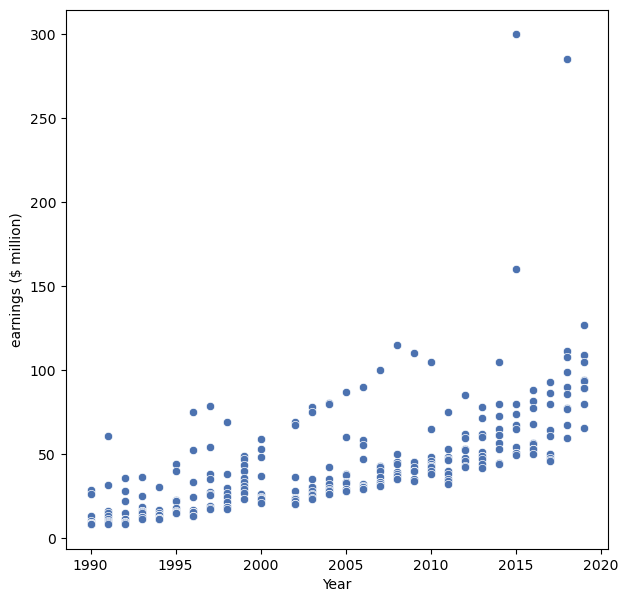

In [54]:
plt.figure(figsize = (7,7))
sns.scatterplot(x='Year',y='earnings ($ million)' , data = df)
plt.show()

### 11 Displaying the earnings trend over the years.


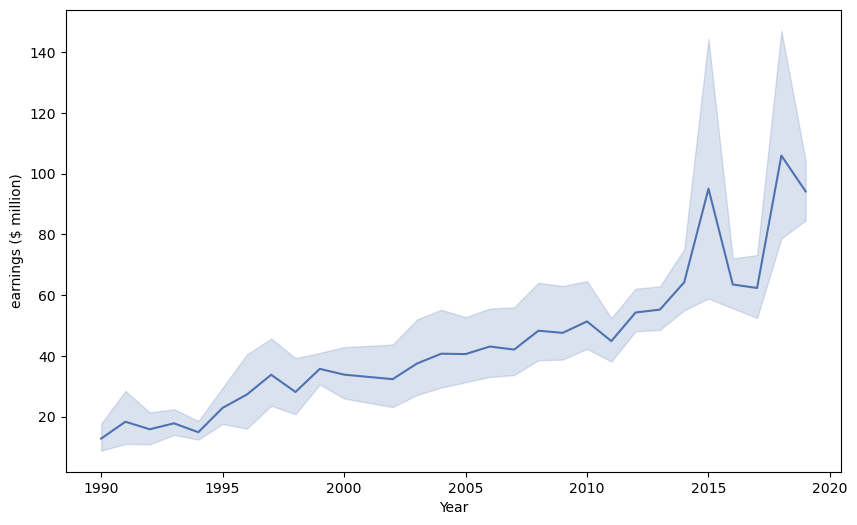

In [55]:
plt.figure(figsize = (10,6))
sns.lineplot(x='Year',y='earnings ($ million)',data = df, estimator=np.mean)
plt.show()

                                            **Happy Learning**